In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import vartools as vt

## get_data

In [2]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"
type = 'Close' # 'Close', select the type of price you want to download

data = vt.get_data(stocks, start_date, end_date, type)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


## var_stocks

In [3]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"
type = 'Close' # 'Close', select the type of price you want to download

data = vt.get_data(stocks, start_date, end_date, type)
n_stocks =[2193, 1211, 3221, 761, 1231]
conf = 95
long = True

var_df = vt.var_stocks(data, n_stocks, conf, long, stocks)
var_df

[*********************100%***********************]  5 of 5 completed


,Métrica,Porcentaje,cash
0,VaR,0.0288,"33,073.8780"
1,cVaR,0.0463,"53,131.4510"


## var_forex

In [4]:
currencies = ['CHFMXN=X', 'MXN=X']
start_date = "2020-01-01"
end_date = "2024-12-02"
type = 'Close'

data = vt.get_data(currencies, start_date, end_date, type)
positions = [7100000, 5300000] # How much you have in each currency. Must match the order in currencies.
conf = 99 # Nivel de confianza
long = True

var_forex_df = vt.var_forex(data, positions, conf, long, currencies)
var_forex_df

[*********************100%***********************]  2 of 2 completed


,Métrica,Porcentual,Cash
0,VaR,0.0185,"5,041,647.6883"
1,cVaR,0.0238,"6,478,978.9919"


## rebalance_stocks

In [5]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"
type = 'Close' # 'Close', select the type of price you want to download

data = vt.get_data(stocks, start_date, end_date, type)

rt = data.pct_change().dropna()
stock_value = n_stocks * data.iloc[-1]
portfolio_value = stock_value.sum()
w_original = stock_value / portfolio_value
w_opt = [0.33, 0.15, 0.06, 0.46, 0.00]

rebalance_df = vt.rebalance_stocks(w_original, w_opt, data, stocks, portfolio_value)
rebalance_df

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,TSLA,AMD,LMT,JPM
Peso Original,0.2457,0.1301,0.1820,0.3064,0.1359
Peso Óptimo,0.3300,0.1500,0.0600,0.4600,0.0000
Acciones (C/V),752.0000,185.0000,"-2,159.0000",381.0000,"-1,231.0000"


## var_weights

In [6]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"
type = 'Close' # 'Close', select the type of price you want to download

data = vt.get_data(stocks, start_date, end_date, type)

weights = [0.2457, 0.1301, 0.1820, 0.3064, 0.1358]
conf = 95
var_pct = vt.var_weights(data, weights, conf)
var_pct

[*********************100%***********************]  5 of 5 completed


0.028849589816371816

## cvar_weights

In [7]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"
type = 'Close' # 'Close', select the type of price you want to download

data = vt.get_data(stocks, start_date, end_date, type)

weights = [0.2457, 0.1301, 0.1820, 0.3064, 0.1358]
conf = 95
cvar_pct = vt.cvar_weights(data, weights, conf)
cvar_pct

[*********************100%***********************]  5 of 5 completed


0.046343940964203766

## opt_sharpe

In [8]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'
type='Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()
rf = 0.04413

opt_sharpe_weights = vt.opt_sharpe(returns, rf)
opt_sharpe_weights

[*********************100%***********************]  8 of 8 completed


array([4.21950859e-01, 1.57706354e-01, 5.45622168e-17, 0.00000000e+00,
       1.41441808e-01, 0.00000000e+00, 2.78900979e-01, 0.00000000e+00])

## min_variance

In [9]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'
type='Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()

min_var_weights = vt.min_variance(returns)
min_var_weights

[*********************100%***********************]  8 of 8 completed


array([0.28334802, 0.        , 0.01944248, 0.25683916, 0.08162812,
       0.25983938, 0.09890284, 0.        ])

## mcc_portfolio

In [10]:
# bonds, commodities, equities and real estate
stocks = ['VBTLX', 'GSG', 'VTI', 'VNQ']
start_date = '2019-01-01'
end_date = '2024-01-01'
type = 'Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()
alpha = 0.05

mcc_weights = vt.mcc_portfolio(returns, alpha)
mcc_weights

[*********************100%***********************]  4 of 4 completed


array([0.66009003, 0.12095162, 0.11713109, 0.10182727])

## cvar_contributions

In [11]:
# bonds, commodities, equities and real estate
stocks = ['VBTLX', 'GSG', 'VTI', 'VNQ']
start_date = '2019-01-01'
end_date = '2024-01-01'
type = 'Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()
alpha = 0.05

mcc_weights = vt.mcc_portfolio(returns, alpha)

cvar_contributions = vt.cvar_contributions(mcc_weights, returns, alpha)
cvar_contributions

[*********************100%***********************]  4 of 4 completed


[0.0029481555762887403,
 0.002964547042268038,
 0.0027411212401196377,
 0.0029631759216875073]

## min_cvar

In [12]:
# bonds, commodities, equities and real estate
stocks = ['VBTLX', 'GSG', 'VTI', 'VNQ']
start_date = '2019-01-01'
end_date = '2024-01-01'
type = 'Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()
alpha = 0.05

min_cvar = vt.min_cvar(returns, alpha)
min_cvar

[*********************100%***********************]  4 of 4 completed


array([9.56288092e-01, 3.74006991e-02, 6.31120928e-03, 4.18374560e-19])

## plot_weights

[*********************100%***********************]  8 of 8 completed


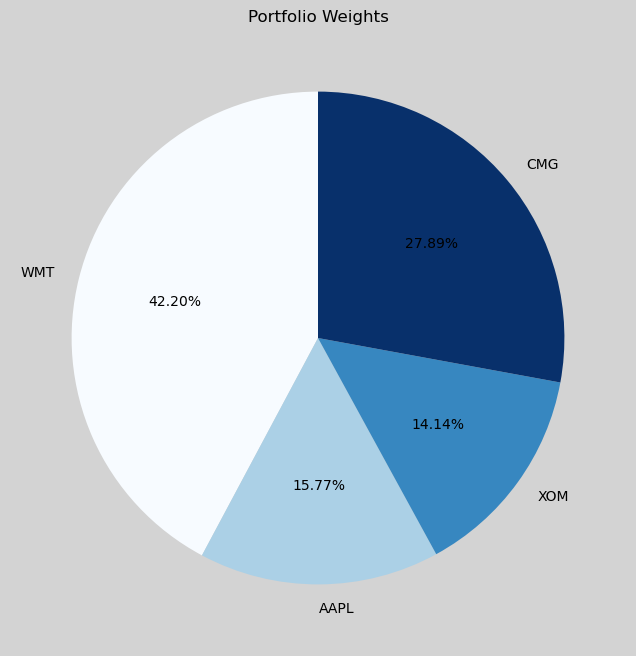

In [13]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'
type='Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()
rf = 0.04413

opt_sharpe = vt.opt_sharpe(returns, rf)

vt.plot_weights(stocks, opt_sharpe)

In [14]:
class BlackScholes:
    def __init__(self, S, k, r, sigma, T):
        """
        Initialize the Black-Scholes model parameters.
        :param S: Current stock price
        :param k: Strike price
        :param r: Risk-free rate
        :param sigma: Volatility of the asset
        :param T: Time to expiration (in years)
        """
        self.S = S
        self.k = k
        self.r = r
        self.sigma = sigma
        self.T = T
        self.d1 = self._calculate_d1()

    def _calculate_d1(self):
        """
        Compute the d1 term in the Black-Scholes formula.
        """
        return (np.log(self.S / self.k) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))

    # Deltas
    def call_delta(self):
        return norm.cdf(self.d1)

    def put_delta(self):
        return np.abs(norm.cdf(self.d1) - 1)

    # Hedge
    def delta_hedge(self, info_call, info_put):

        # Dataframe for call and put options
        df_call = pd.DataFrame(info_call, columns=['S', 'K', 'r', 'sigma', 'T', 'N'])
        df_put = pd.DataFrame(info_put, columns=['S', 'K', 'r', 'sigma', 'T', 'N'])

        df_call['delta'] = df_call.apply(lambda row: BlackScholes(*row[0:-1]).call_delta(), axis=1)
        df_put['delta'] = df_put.apply(lambda row: BlackScholes(*row[0:-1]).put_delta(), axis=1)
            
        return np.dot(df_call['N'], df_call['delta']) - np.dot(df_put['N'], df_put['delta'])

## call_delta and put_delta

In [ ]:
# other way to do it
S_call = 20.3
K_call = 20.43
r_call = 0.0425
sigma_call = 0.102
T_call = 1/12

S_put = 20.3
K_put = 20.2
r_put = 0.0425
sigma_put = 0.156
T_put = 1/12

delta_call = vt.BlackScholes(S_call, K_call, r_call, sigma_call, T_call).call_delta()
delta_put = vt.BlackScholes(S_put, K_put, r_put, sigma_put, T_put).put_delta()

delta_call, delta_put

(0.46740603432697553, 0.4165136615097752)

In [ ]:
# Write in order S, K, r, sigma, T

call = [20.3, 20.43, 0.0425, 0.102, 1/12]
put = [20.3, 20.2, 0.0425, 0.156, 1/12]

delta_call = vt.BlackScholes(*call).call_delta()
delta_put = vt.BlackScholes(*put).put_delta()

delta_call, delta_put

(0.46740603432697553, 0.4165136615097752)

## delta_hedge

In [ ]:
# Write in order S, K, r, sigma, T, N (money invested in each option)

info_call = [[20.3, 20.43, 0.0425, 0.102, 1/12, 23],
            [20.3, 20.52, 0.0425, 0.111, 1/12, 25],
            [20.3, 20.43, 0.0421, 0.297, 6/12, 17],
            [20.3, 20.52, 0.0421, 0.289, 6/12, 32]]

info_put = [[20.3, 20.2, 0.0425, 0.156, 1/12, 12],
            [20.3, 20, 0.0425, 0.153, 1/12, 16],
            [20.3, 20.2, 0.0421, 0.348, 6/12, 11],
            [20.3, 20, 0.0421, 0.378, 6/12, 17]]

# If N is in millions of dollar, then
hedge = vt.BlackScholes(1,1,1,1,1).delta_hedge(info_call, info_put)
print(f'Buy {hedge} millions of dollars of the underlying asset')

Buy 27.301081694288555 millions of dollars of the underlying asset
